In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [6]:
cancer = pd.read_excel('/content/sample_data/cancer_patient_data_sets.xlsx')

**Data Pre Processing**

In [7]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [8]:
# Finding Number of Rows And Columns

cancer.shape
print(f"The Number Of Rows : {cancer.shape[0]}")
print(f"The Number Of Columns is : {cancer.shape[1]}")

The Number Of Rows : 1000
The Number Of Columns is : 25


In [9]:
# Gathering some information about data
# All The Data is int except (Patient Id, Level) are object

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [10]:
# Getting Descreptive information about data

cancer.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [11]:
# Showing Null Values

cancer.isnull().sum()

,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0
Balanced Diet,0


In [12]:
# Showing Duplicates

duplicated_values = cancer[cancer.duplicated()]
duplicated_values

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [13]:
cancer.nunique()

,0
Patient Id,1000
Age,40
Gender,2
Air Pollution,8
Alcohol use,8
Dust Allergy,8
OccuPational Hazards,8
Genetic Risk,7
chronic Lung Disease,7
Balanced Diet,7


In [14]:
cancer['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [15]:
# Dropping unnecessary columns for our preduction and analysis

cancer = cancer.drop(['Patient Id'], axis=1)
cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


**Applying Label Encoder**

In [16]:
encoder = LabelEncoder()
encoded_level = encoder.fit_transform(cancer['Level'])
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [17]:
#Generating Data Frame out of encoded data

encoded_level_df = pd.DataFrame(encoded_level)

# The Column named 'Level' is now renamed to '0'

cancer = cancer.drop('Level', axis=1)
cancer = pd.concat([cancer,encoded_level_df], axis=1)
cancer.columns

Index([                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          0],
      dtype='object')

In [64]:
# Rename the column 'Level' with it's original name

cancer.columns=[                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          'Level']

#checking if our experiment is working good
cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


**Exploratory Data Analysis and Data Visualization**

<Axes: xlabel='Age', ylabel='Density'>

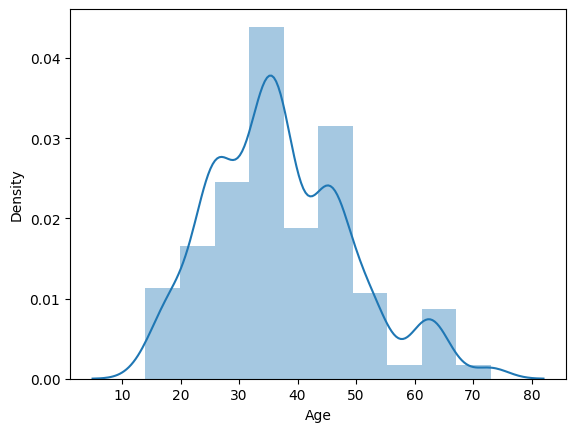

In [19]:
#Age Distribution by Risk Visualization in Histogram
#Createing "Bins" and set an appropriate bin size (e.g., 5 or 10 years)

sns.distplot(cancer['Age'], bins=10)

**Regression analysis** is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the **relationship between variables and for modeling** the future relationship between them.

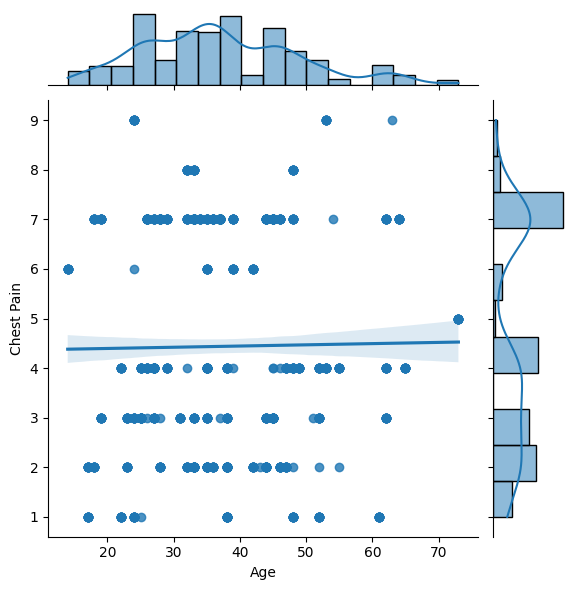

In [20]:
# Trying to find the relationship between 'Age' in X -axis vs. 'Chest Pain' in Y -axis by Regression Analysis

sns.jointplot(x='Age', y='Chest Pain', data=cancer, kind='reg')

<Axes: >

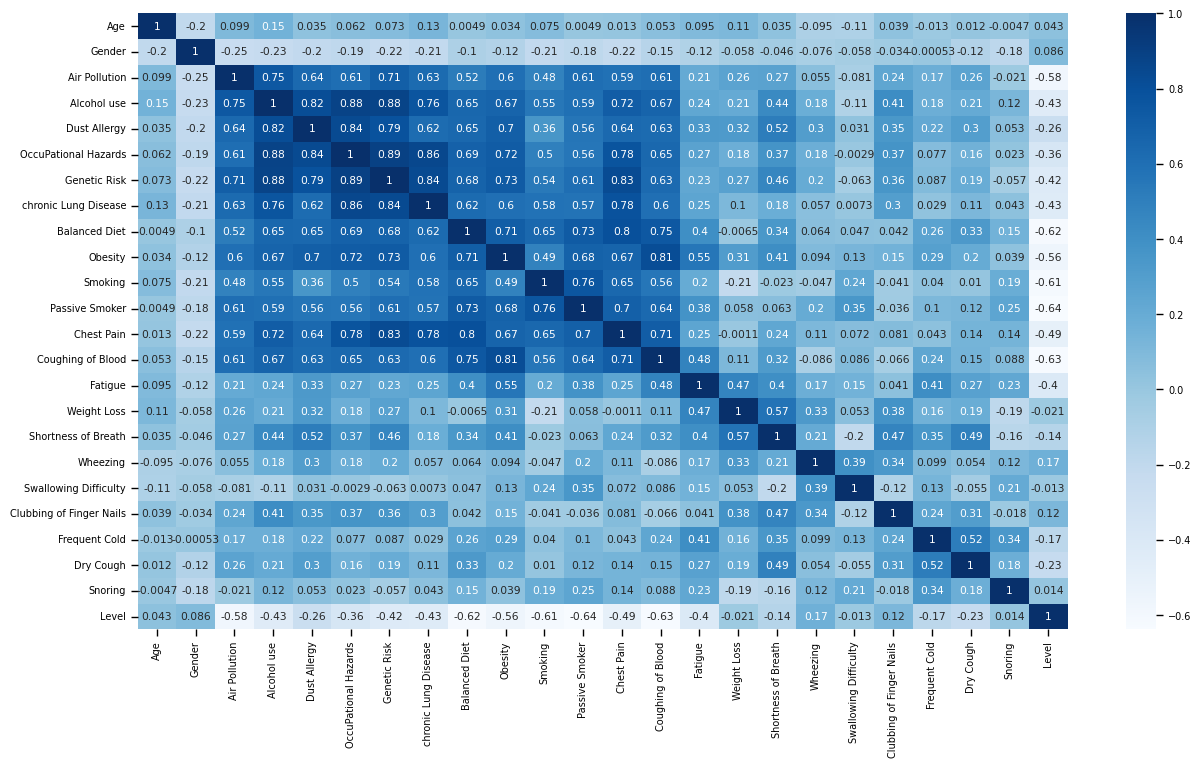

In [21]:
#visualizing the correlation between different variables in dataset using a heatmap.

plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=0.8)

cancer_mx = cancer.corr()
sns.heatmap(cancer_mx, annot=True, cmap='Blues')

In [89]:
# prompt: create another dataset with Fatigue, Chest Pain, Coughing of Blood, Passive Smoker, Smoking, Obesity, Balanced Diet, Chronic Lung Disease, Genetic Risk, Alcohol use, Air Pollution

# Select the specified columns to create a new dataset
selected_columns = ['Air Pollution', 'Alcohol use', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet',
                    'Obesity', 'Smoking', 'Passive Smoker', 'Coughing of Blood', 'Chest Pain', 'Fatigue', 'Level']

# Check if the selected columns exist in the original DataFrame
existing_columns = [col for col in selected_columns if col in cancer.columns]

if len(existing_columns) == len(selected_columns):
    new_dataset = cancer[existing_columns].copy()
    print("New dataset created with the specified columns:")
    print(new_dataset.head())
else:
    print("Warning: Some specified columns were not found in the original DataFrame.")
    print("Columns found:", existing_columns)
    print("Columns not found:", list(set(selected_columns) - set(existing_columns)))
    # Create a dataset with the existing columns if some were not found
    if existing_columns:
        new_dataset = cancer[existing_columns].copy()
        print("New dataset created with the existing specified columns:")
        print(new_dataset.head())
    else:
        print("No specified columns were found in the original DataFrame.")
        new_dataset = pd.DataFrame() # Create an empty DataFrame


New dataset created with the specified columns:
   Air Pollution  Alcohol use  Genetic Risk  chronic Lung Disease  \
0              2            4             3                     2   
1              3            1             4                     2   
2              4            5             5                     4   
3              7            7             6                     7   
4              6            8             7                     6   

   Balanced Diet  Obesity  Smoking  Passive Smoker  Coughing of Blood  \
0              2        4        3               2                  4   
1              2        2        2               4                  3   
2              6        7        2               3                  8   
3              7        7        7               7                  8   
4              7        7        8               7                  9   

   Chest Pain  Fatigue  Level  
0           2        3      1  
1           2        1      2  
2 

In [90]:
new_dataset.head()

,Air Pollution,Alcohol use,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Coughing of Blood,Chest Pain,Fatigue,Level
0,2,4,3,2,2,4,3,2,4,2,3,1
1,3,1,4,2,2,2,2,4,3,2,1,2
2,4,5,5,4,6,7,2,3,8,4,8,0
3,7,7,6,7,7,7,7,7,8,7,4,0
4,6,8,7,6,7,7,8,7,9,7,3,0


<Figure size 1500x800 with 0 Axes>

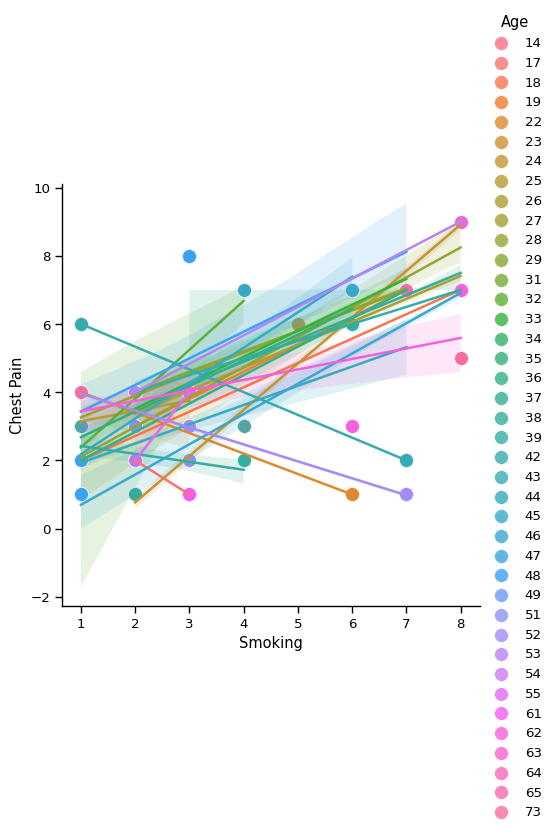

In [22]:
# Generating a scatter plot with a regression line using the seaborn library. It
# visualizes the relationship between 'Smoking' and 'Chest Pain', with different
# colors representing 'Age'.

plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=1.1)
sns.lmplot(x='Smoking', y='Chest Pain', hue='Age', data=cancer, scatter_kws={'s':100, 'linewidths': 0.5, 'edgecolor':'w'})

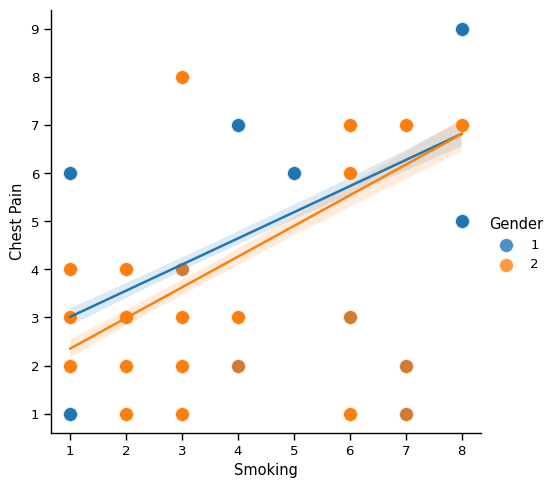

In [23]:
# visualizeing the relationship between 'Smoking' and 'Chest Pain', with
# different colors representing 'Gender'.

sns.lmplot(x='Smoking', y='Chest Pain', hue='Gender', data=cancer, scatter_kws={'s':100, 'linewidths': 0.5, 'edgecolor':'w'})

The code bellow generates a grid of plots. Each plot within the grid shows the relationship between 'chronic Lung Disease' and 'Shortness of Breath'. The grid is structured such that plots in the same column represent the same gender, and plots in the same row represent the same smoking status. This allows for a visual comparison of the relationship between 'chronic Lung Disease' and 'Shortness of Breath' across different combinations of gender and smoking habits.

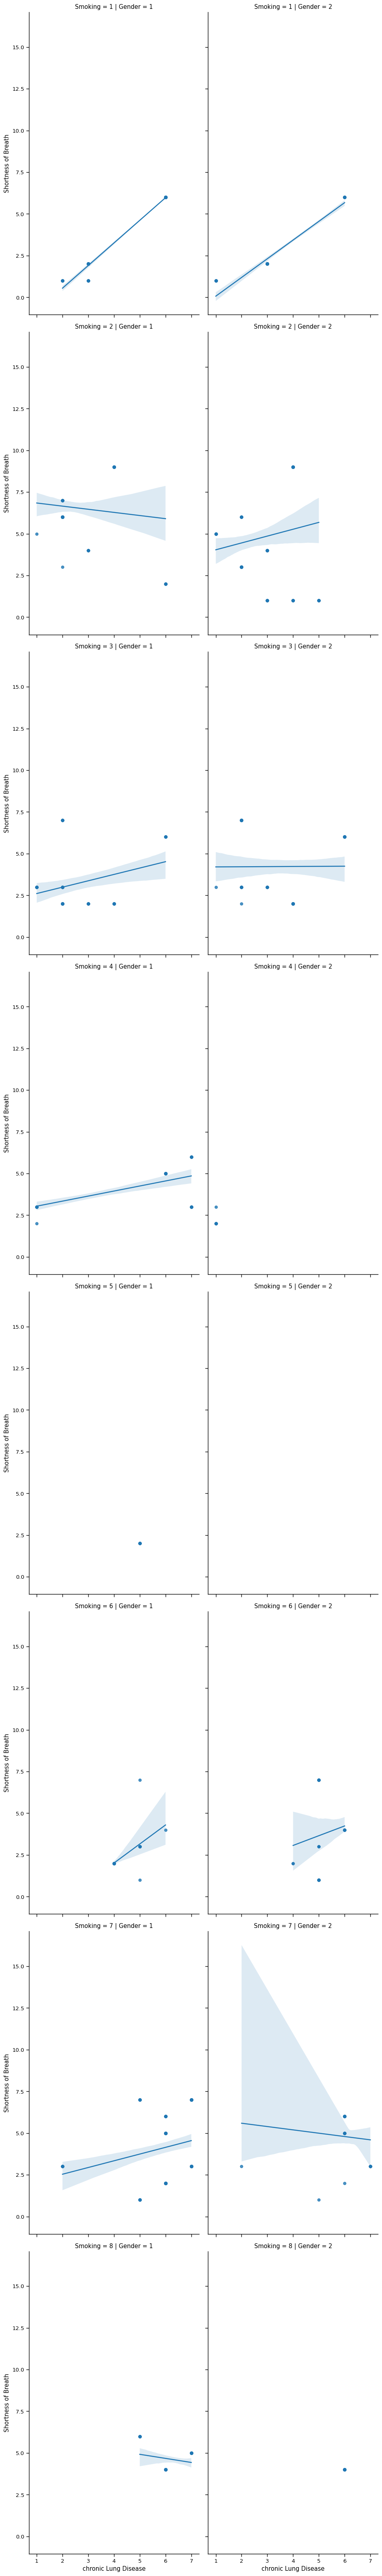

In [24]:
sns.lmplot(x='chronic Lung Disease', y='Shortness of Breath', col='Gender', row='Smoking', data=cancer, height=8, aspect=0.6)

**Cancer Patient Prediction Machine Learning**

In [74]:
#Dividing Data into featurs and target

#x = cancer.iloc[:, :-1]
#y = cancer.iloc[:, -1]

#Dividing Data into featurs and target on new_dataset

x = new_dataset.iloc[:, :-1]
y = new_dataset.iloc[:, -1]

#Splitting the data for training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)
# stratify=y ensures that the proportion of classes in y_train and y_test is the
# same as in the original dataset.

print(f"\nTraining set size: {len(x_train)} samples")
print(f"Testing set size: {len(x_test)} samples")



Training set size: 750 samples
Testing set size: 250 samples


**Logistic Regression**

In [81]:
# Logistic regression is a supervised machine learning algorithm widely used for
# binary classification tasks

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

predict_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, predict_lr)
print(f"Accuracy of Logistic Regression Model : {accuracy_lr}")

cm_lr = confusion_matrix(predict_lr, y_test)
cm_lr

Accuracy of Logistic Regression Model : 0.924


array([[91,  0,  0],
       [ 0, 62,  5],
       [ 0, 14, 78]])

In [82]:
# Classification Report

print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.93      0.82      0.87        76
           2       0.85      0.94      0.89        83

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



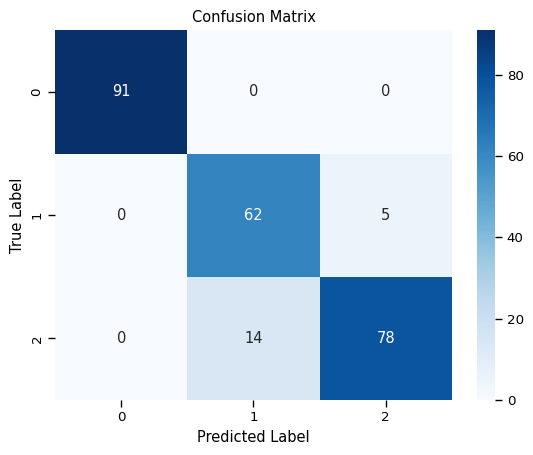

In [83]:
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Support Vector Machine (SVM)**

In [84]:
# SVM is a supervised machine learning algorithm that classifies data by finding
# an optimal line or hyperplane that maximizes the distance between each class
# in an N-dimensional space.

model_svm = SVC(C=1, gamma=0.01, kernel='rbf')
model_svm.fit(x_train, y_train)

SVC(C=1, gamma=0.01)

predict_svm = model_svm.predict(x_test)
accuracy_svm = accuracy_score(predict_svm, y_test)
print(f"Accuracy of Support Vector Machine Model : {accuracy_svm}")

cm_svm = confusion_matrix(predict_svm, y_test)
cm_svm


Accuracy of Support Vector Machine Model : 0.944


array([[91,  0,  0],
       [ 0, 67,  5],
       [ 0,  9, 78]])

In [85]:
# Classification Report

print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.93      0.88      0.91        76
           2       0.90      0.94      0.92        83

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



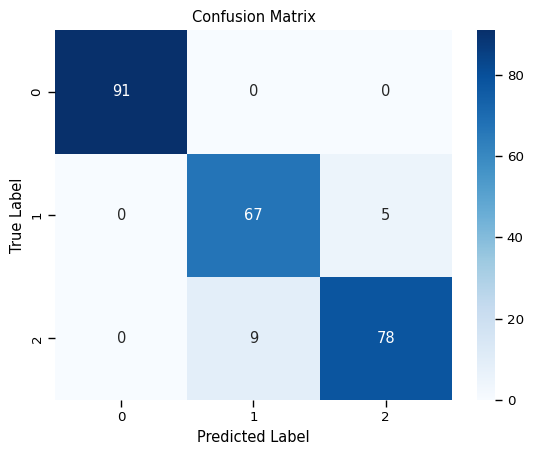

In [86]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree Model**

In [92]:
# --- Train the Decision Tree Model --- Initialize the Decision Tree Classifier
# You can tune parameters like max_depth, min_samples_leaf, criterion='entropy'
# For a first run, we'll keep it simple or set a max_depth to avoid extreme
# overfitting.
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5) # max_depth limits tree growth for interpretability

# Train the model
dt_classifier.fit(x_train, y_train)

print("\nDecision Tree Classifier trained successfully!")



Decision Tree Classifier trained successfully!


In [93]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(x_test)

# Calculate Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy of the Decision Tree Classifier: {accuracy_dt:.4f}")

# Display Classification Report
# This shows precision, recall, f1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=encoder.classes_))



Accuracy of the Decision Tree Classifier: 0.9880

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       1.00      0.96      0.98        76
      Medium       0.97      1.00      0.98        83

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [95]:
# Display Confusion Matrix
# Helps to see where the model made mistakes (e.g., predicted Medium when it was High)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm_dt)



Confusion Matrix:
[[91  0  0]
 [ 0 73  3]
 [ 0  0 83]]


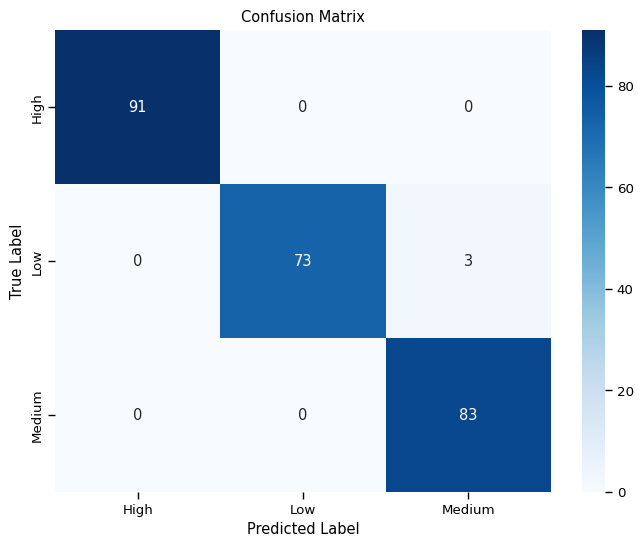

In [96]:
# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

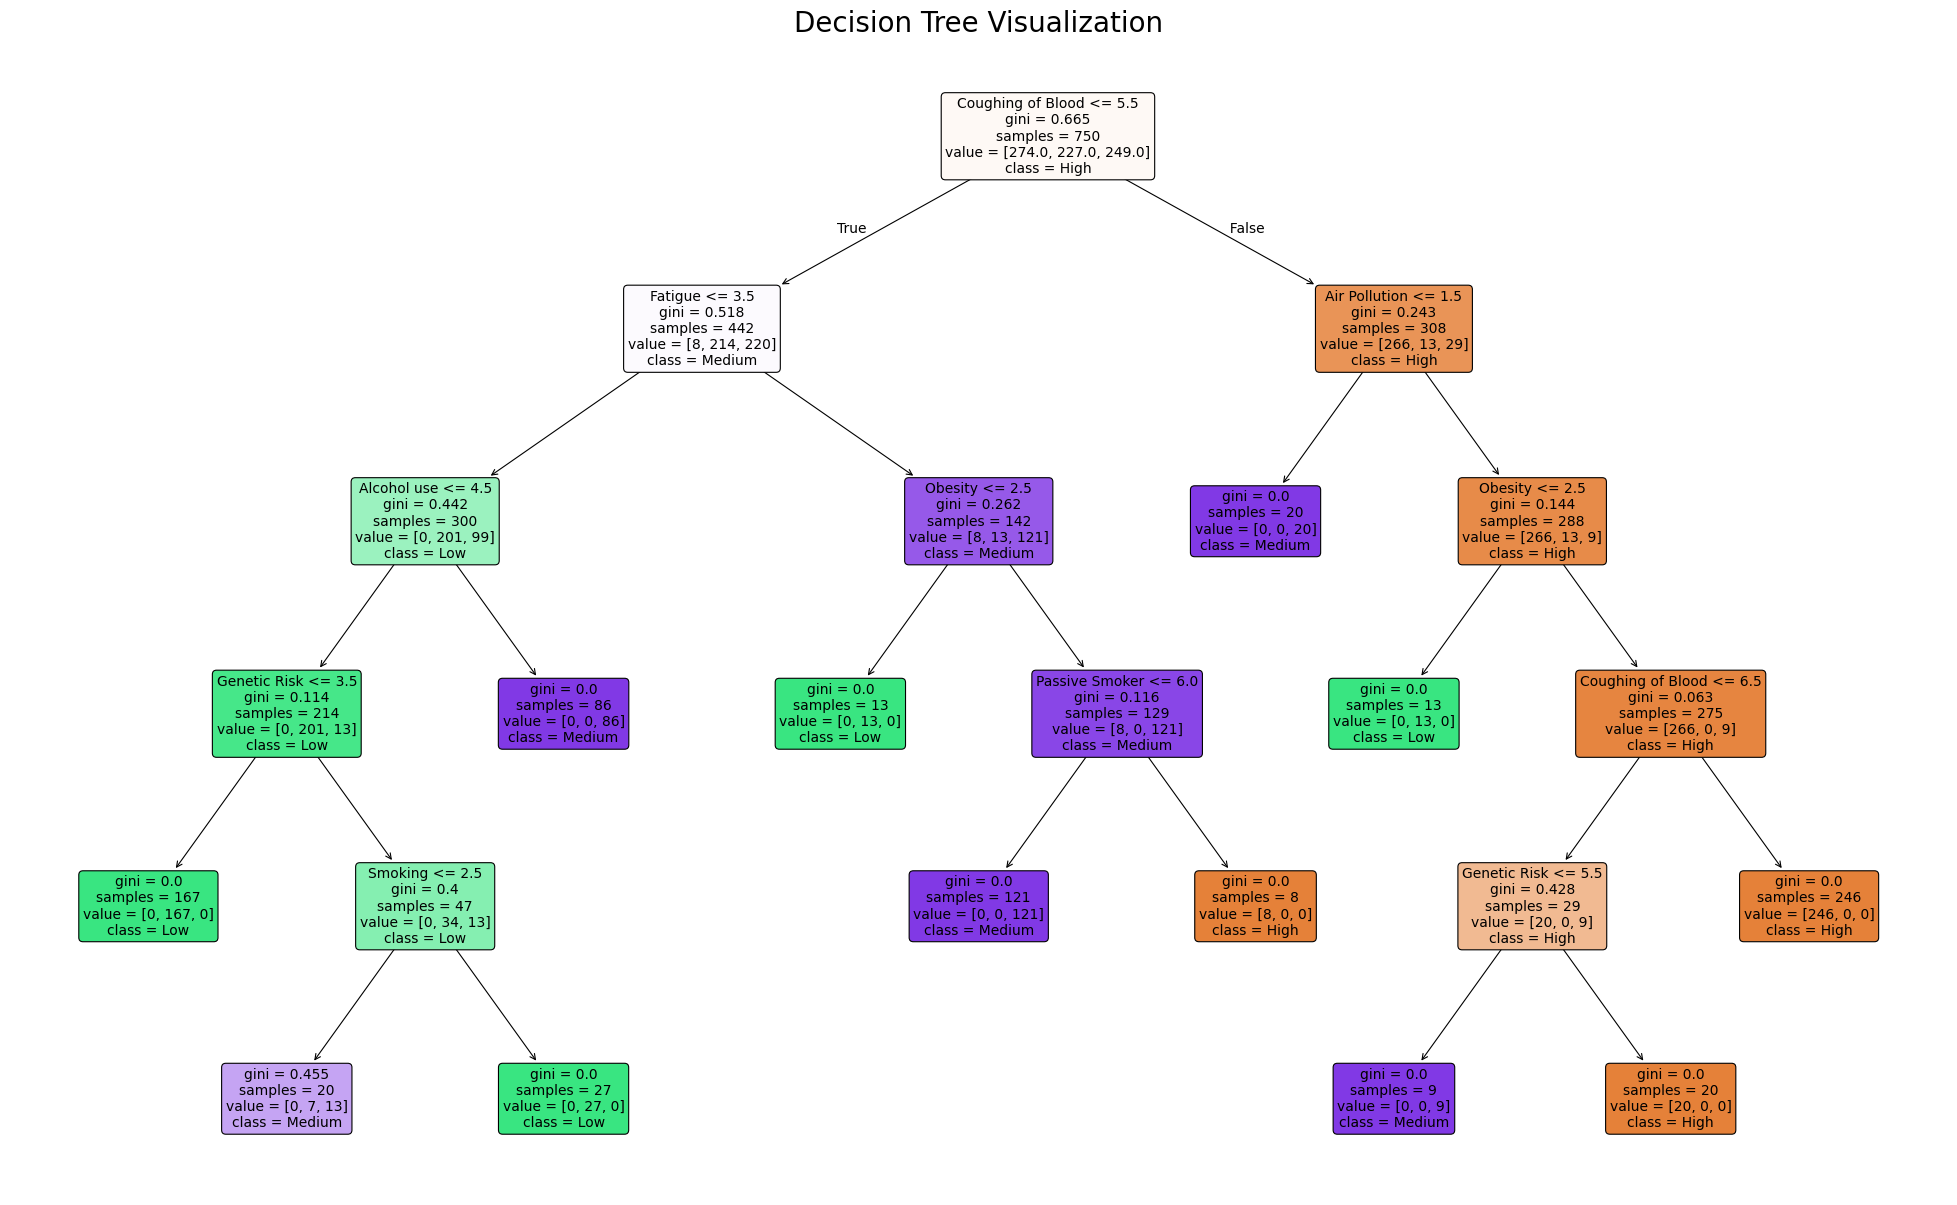

In [97]:
# --- Visualize the Decision Tree (Optional) ---
# This helps in understanding how the tree makes decisions.
# Requires graphviz if you want more interactive/exportable plots, but plot_tree is built-in.

plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          feature_names=x.columns.tolist(),
          class_names=encoder.classes_.tolist(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()


Feature Importances:
                 Feature  Importance
2      Coughing of Blood    0.408207
9            Alcohol use    0.221156
0                Fatigue    0.120199
5                Obesity    0.094573
10         Air Pollution    0.068534
8           Genetic Risk    0.036831
3         Passive Smoker    0.030664
4                Smoking    0.019837
1             Chest Pain    0.000000
6          Balanced Diet    0.000000
7   chronic Lung Disease    0.000000


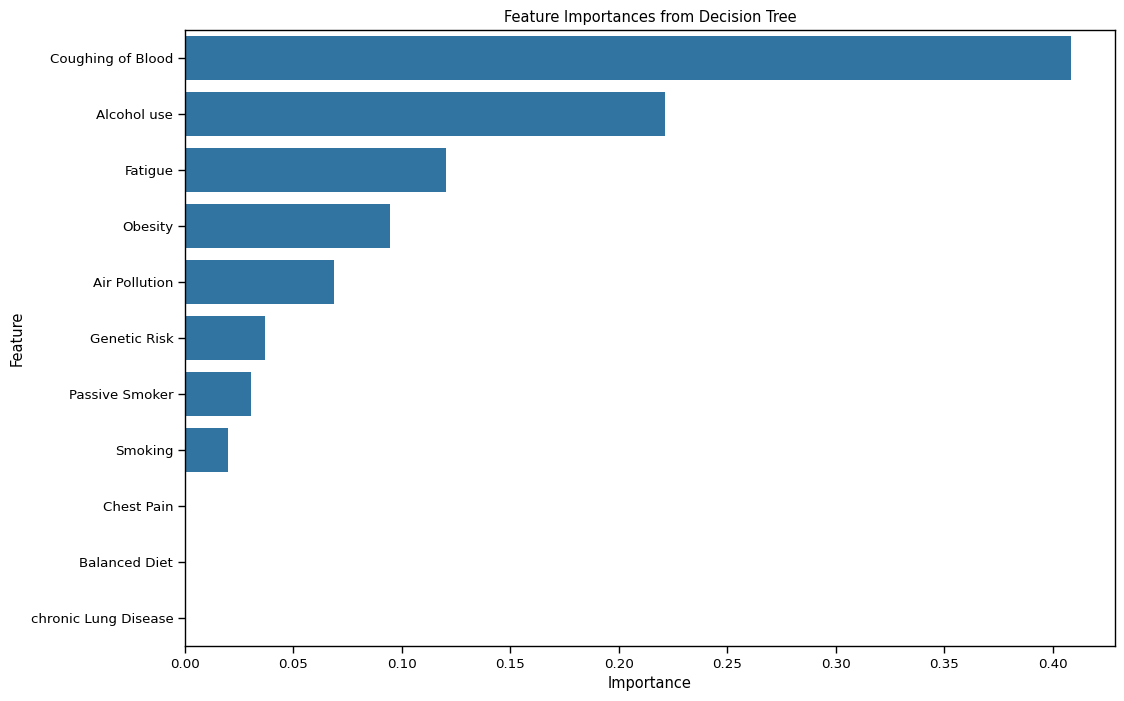

In [98]:
# Optional: Feature Importance
# See which features the tree considered most important for making predictions
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Optional: Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Random Forest Classifier**

In [99]:
# --- Random Forest Classifier ---
#Implement and Train the Random Forest Model ---
# Initialize the Random Forest Classifier
# You can tune parameters like n_estimators (number of trees), max_depth, min_samples_leaf, etc.
# For a start, a reasonable number of estimators is good.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model
rf_classifier.fit(x_train, y_train)

print("\nRandom Forest Classifier trained successfully!")



Random Forest Classifier trained successfully!


In [101]:
# --- Evaluate the Model ---

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy of the Random Forest Classifier: {accuracy_rf:.4f}")

# Display Classification Report
# This shows precision, recall, f1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=encoder.classes_))

# Display Confusion Matrix
# Helps to see where the model made mistakes (e.g., predicted Medium when it was High)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)



Accuracy of the Random Forest Classifier: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        83

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


Confusion Matrix:
[[91  0  0]
 [ 0 76  0]
 [ 0  0 83]]


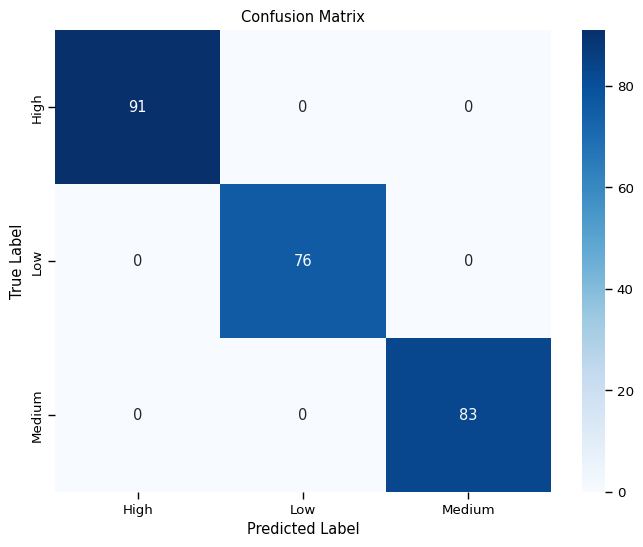

In [102]:
#Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [103]:
# --- Feature Importance (Specific to Ensemble Models) ---
# See which features the Random Forest model considered most important for making predictions
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importances)



Feature Importances from Random Forest:
                 Feature  Importance
2      Coughing of Blood    0.206874
3         Passive Smoker    0.144852
5                Obesity    0.130107
0                Fatigue    0.122235
9            Alcohol use    0.099114
6          Balanced Diet    0.074387
8           Genetic Risk    0.058730
1             Chest Pain    0.051187
10         Air Pollution    0.047379
4                Smoking    0.039386
7   chronic Lung Disease    0.025748


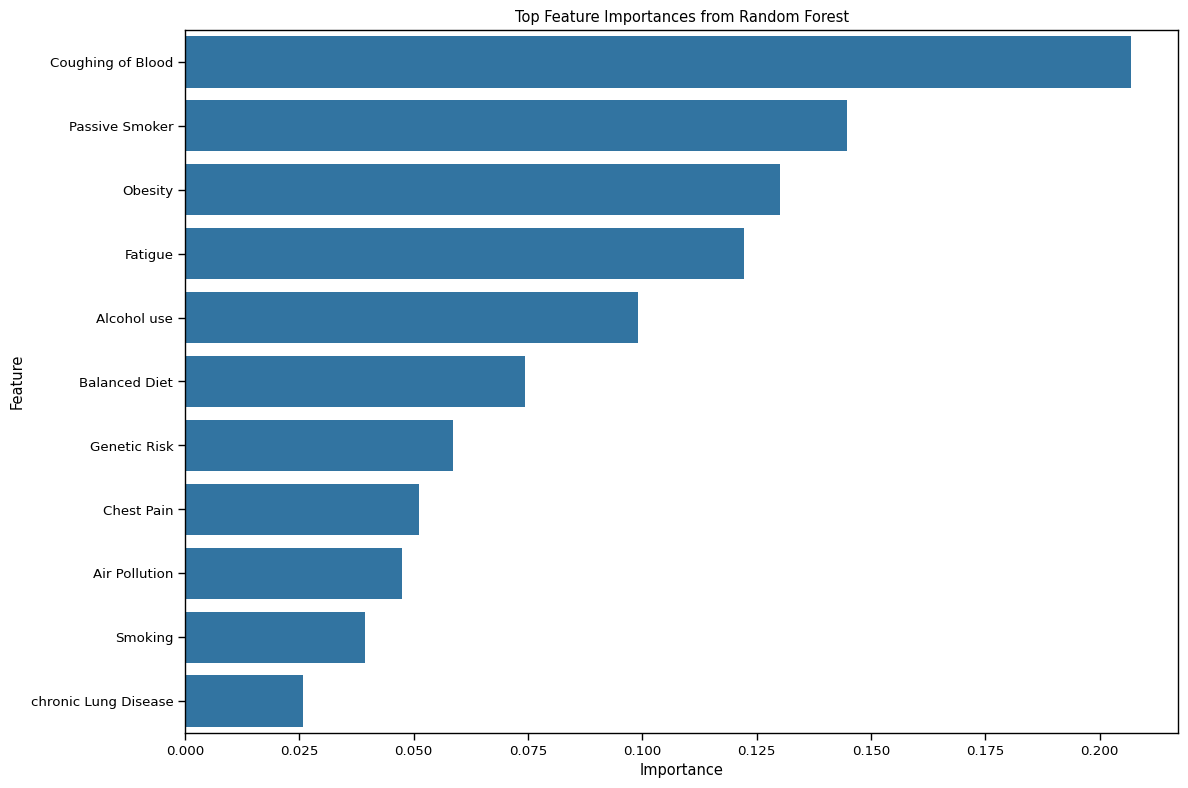

In [104]:
# Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15)) # Show top 15 features
plt.title('Top Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**K-Nearest Neighbors (KNN)**

In [105]:
# --- Feature Scaling (CRUCIAL for KNN) ---
# KNN calculates distances between data points, so features with larger ranges
# can disproportionately influence the distance. Scaling ensures all features
# contribute equally. StandardScaler makes the mean 0 and standard deviation 1.

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

print("\nFeatures scaled successfully using StandardScaler.")
print("First 10 rows of scaled training features (X_train_scaled):")
print(X_train_scaled[:10])



Features scaled successfully using StandardScaler.
First 10 rows of scaled training features (X_train_scaled):
[[ 0.08066317 -0.64250714 -0.34724384 -0.94783172 -0.37906117 -0.70161641
  -0.70726621 -0.22486242 -1.2281334  -0.98481054 -1.38202427]
 [-0.36746554  1.13564916  1.70988793  1.20894555  1.64583824  1.19293735
   1.18213596  0.87740435  1.12882681  1.32093734  2.04044149]
 [ 0.08066317 -0.64250714 -1.17009655 -0.94783172  0.83587848 -1.64889329
   0.23743487 -0.22486242 -1.2281334  -0.98481054 -0.40417691]
 [-0.81559426 -1.08704622 -1.17009655 -0.94783172 -1.18902093 -1.17525485
  -0.70726621 -1.87826257 -1.2281334  -0.98481054 -0.40417691]
 [-0.81559426 -0.19796807 -0.7586702  -0.94783172 -1.18902093 -0.22797797
  -1.17961675  0.87740435  1.12882681  1.32093734  1.06259413]
 [-1.26372297 -0.19796807 -0.34724384 -0.51647626 -0.78404105 -0.70161641
  -0.70726621 -0.77599581 -0.28534932 -0.60051922 -0.89310059]
 [-0.36746554 -1.08704622 -1.17009655 -0.51647626 -0.37906117 -1.1

In [123]:
# --- Implement and Train the K-Nearest Neighbors (KNN) Model ---
# Initialize the KNN Classifier
# The 'n_neighbors' parameter (k) is critical. A common starting point is 5.
# Eexperimenting with different values of k.
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights="distance", metric='minkowski', p=2)

# Train the model
knn_classifier.fit(X_train_scaled, y_train) # Train on scaled data
#knn_classifier.fit(x_train, y_train) # Train on new_dataset non scaled data

print(f"\nK-Nearest Neighbors Classifier trained successfully with n_neighbors = {knn_classifier.n_neighbors}!")



K-Nearest Neighbors Classifier trained successfully with n_neighbors = 7!


In [124]:
# --- Evaluate the Model ---

# Make predictions on the scaled test set
y_pred_knn = knn_classifier.predict(X_test_scaled) # Predict on scaled data

# Calculate Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy of the KNN Classifier: {accuracy_knn:.4f}")

# Display Classification Report
# This shows precision, recall, f1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=encoder.classes_))

# Display Confusion Matrix
# Helps to see where the model made mistakes (e.g., predicted Medium when it was High)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm_knn)


Accuracy of the KNN Classifier: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        83

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


Confusion Matrix:
[[91  0  0]
 [ 0 76  0]
 [ 0  0 83]]


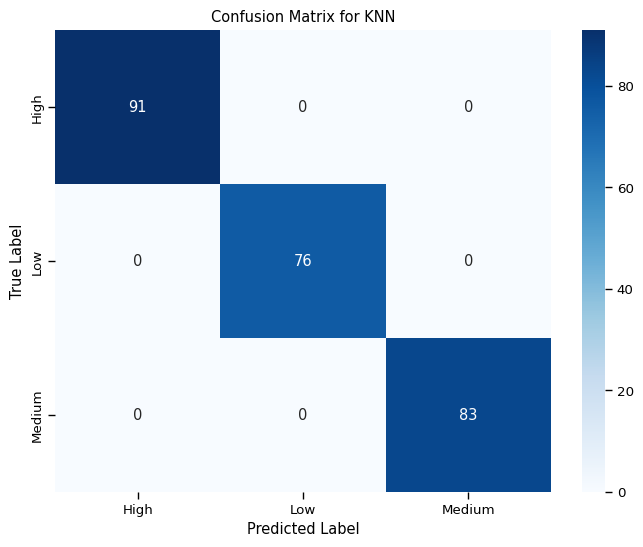

In [125]:
# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



--- Finding Optimal 'k' ---


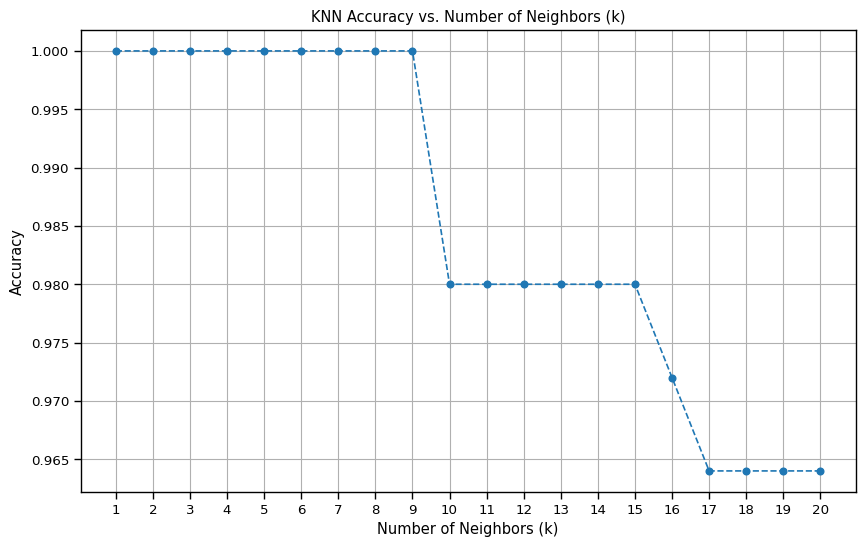

Optimal 'k' found (based on this range): 1 with accuracy 1.0000


In [126]:
# --- Finding Optimal 'k' using a simple loop ---
# It's good practice to try a range of 'k' values to find the best one.
# This simple loop plots accuracy vs. k.

print("\n--- Finding Optimal 'k' ---")
accuracies = []
k_range = range(1, 21) # Test k from 1 to 20

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='--')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"Optimal 'k' found (based on this range): {optimal_k} with accuracy {max(accuracies):.4f}")